# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import datetime
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
settings = {"units": "imperial", "appid": api_key}


w_dict = {} #Dictionary is awkward for this but is global

def api_call(set, call):
    counter = 1
    start_val = (set - 1) * 50
    end_val = start_val + 50
    if end_val > len(cities):
        end_val = len(cities)
    for i in range(start_val, end_val):
        try:
            cur_c = cities[i]
            result = owm.get_current(cur_c, **settings)
            name = result['name']
            current_i = cities.index(cur_c)
            print(f'Processing Record {counter} ({current_i}) of Set {set}/{all_sets}. | {name}')
            w_dict[cur_c]={}
            w_dict[cur_c]['Name'] = result['name']
            w_dict[cur_c]['Date'] = result['dt']
            w_dict[cur_c]['Cloudiness'] = result['clouds']['all']
            w_dict[cur_c]['Country'] = result['sys']['country']
            w_dict[cur_c]['Humidity'] = result['main']['humidity']
            w_dict[cur_c]['Lat'] = result['coord']['lat']
            w_dict[cur_c]['Lng'] = result['coord']['lon']
            w_dict[cur_c]['Max Temperature'] = result['main']['temp_max']
            w_dict[cur_c]['Wind'] = result['wind']['speed']
            counter +=1
            if counter > 50:
                break
        except:
            print('City not found. Skipping...')
            continue
        

all_sets = (len(cities) // 50) +1
for x in range(1, all_sets+1):
    api_call(x, cities)
    time.sleep(10)
print('--------------')
print('Data Retrieval Complete')
print('--------------')

City not found. Skipping...
Processing Record 1 (1) of Set 1/13. | Bluff
City not found. Skipping...
Processing Record 2 (3) of Set 1/13. | Castro
Processing Record 3 (4) of Set 1/13. | Sibolga
Processing Record 4 (5) of Set 1/13. | Barrow
Processing Record 5 (6) of Set 1/13. | Itacoatiara
Processing Record 6 (7) of Set 1/13. | Sitka
Processing Record 7 (8) of Set 1/13. | Apucarana
City not found. Skipping...
Processing Record 8 (10) of Set 1/13. | Chuy
Processing Record 9 (11) of Set 1/13. | Katsuura
Processing Record 10 (12) of Set 1/13. | Punta Arenas
Processing Record 11 (13) of Set 1/13. | Hilo
Processing Record 12 (14) of Set 1/13. | Rylsk
Processing Record 13 (15) of Set 1/13. | Rikitea
Processing Record 14 (16) of Set 1/13. | Kota Belud
Processing Record 15 (17) of Set 1/13. | Ushuaia
Processing Record 16 (18) of Set 1/13. | La Ronge
Processing Record 17 (19) of Set 1/13. | Asosa
Processing Record 18 (20) of Set 1/13. | Ulladulla
Processing Record 19 (21) of Set 1/13. | Bethel


Processing Record 19 (173) of Set 4/13. | Carnarvon
Processing Record 20 (174) of Set 4/13. | Vaitape
Processing Record 21 (175) of Set 4/13. | Longyearbyen
City not found. Skipping...
Processing Record 22 (177) of Set 4/13. | Avarua
Processing Record 23 (178) of Set 4/13. | Churapcha
Processing Record 24 (179) of Set 4/13. | San Patricio
Processing Record 25 (180) of Set 4/13. | Baruun-Urt
Processing Record 26 (181) of Set 4/13. | Hermanus
Processing Record 27 (182) of Set 4/13. | Bambous Virieux
Processing Record 28 (183) of Set 4/13. | Coihaique
Processing Record 29 (184) of Set 4/13. | Ahipara
Processing Record 30 (185) of Set 4/13. | Bonthe
Processing Record 31 (186) of Set 4/13. | Rancho Veloz
Processing Record 32 (187) of Set 4/13. | Yangjiang
Processing Record 33 (188) of Set 4/13. | College
Processing Record 34 (189) of Set 4/13. | Lugovoy
Processing Record 35 (190) of Set 4/13. | Homer
Processing Record 36 (191) of Set 4/13. | Kodiak
Processing Record 37 (192) of Set 4/13. | 

Processing Record 37 (338) of Set 7/13. | Mehamn
Processing Record 38 (339) of Set 7/13. | Khovu-Aksy
Processing Record 39 (340) of Set 7/13. | Luis Correia
Processing Record 40 (341) of Set 7/13. | Faya
Processing Record 41 (342) of Set 7/13. | Bastia
Processing Record 42 (343) of Set 7/13. | Mujiayingzi
Processing Record 43 (344) of Set 7/13. | Acajutla
Processing Record 44 (345) of Set 7/13. | Maravilha
Processing Record 45 (346) of Set 7/13. | Lompoc
Processing Record 46 (347) of Set 7/13. | Kalmunai
Processing Record 47 (348) of Set 7/13. | Dera Bugti
Processing Record 48 (349) of Set 7/13. | Sinop
Processing Record 1 (350) of Set 8/13. | Khasan
Processing Record 2 (351) of Set 8/13. | Xuddur
Processing Record 3 (352) of Set 8/13. | Dukat
City not found. Skipping...
Processing Record 4 (354) of Set 8/13. | Gao
Processing Record 5 (355) of Set 8/13. | Ketchikan
City not found. Skipping...
Processing Record 6 (357) of Set 8/13. | Bakel
Processing Record 7 (358) of Set 8/13. | Presid

Processing Record 4 (503) of Set 11/13. | Navsari
Processing Record 5 (504) of Set 11/13. | Storforshei
Processing Record 6 (505) of Set 11/13. | Andilamena
Processing Record 7 (506) of Set 11/13. | Hun
Processing Record 8 (507) of Set 11/13. | La Orilla
Processing Record 9 (508) of Set 11/13. | Russell
Processing Record 10 (509) of Set 11/13. | Puerto del Rosario
Processing Record 11 (510) of Set 11/13. | Maralal
Processing Record 12 (511) of Set 11/13. | Lebanon
Processing Record 13 (512) of Set 11/13. | Talnakh
Processing Record 14 (513) of Set 11/13. | Petropavl
Processing Record 15 (514) of Set 11/13. | Dalbandin
Processing Record 16 (515) of Set 11/13. | Kolchugino
City not found. Skipping...
Processing Record 17 (517) of Set 11/13. | Bridlington
Processing Record 18 (518) of Set 11/13. | Cedar City
Processing Record 19 (519) of Set 11/13. | Praya
Processing Record 20 (520) of Set 11/13. | Saryg-Sep
City not found. Skipping...
Processing Record 21 (522) of Set 11/13. | Rocha
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:

weather_df = pd.DataFrame({
    'City' : [w_dict[x]['Name'] for x in w_dict],
    'Date' : [w_dict[x]['Date'] for x in w_dict],
    'Cloudiness' : [w_dict[x]['Cloudiness'] for x in w_dict],
    'Country' : [w_dict[x]['Country'] for x in w_dict],
    'Humidity' : [w_dict[x]['Humidity'] for x in w_dict],
    'Lat' : [w_dict[x]['Lat'] for x in w_dict],
    'Lng' : [w_dict[x]['Lng'] for x in w_dict],
    'Max Temperature' : [w_dict[x]['Max Temperature'] for x in w_dict],
    'Wind' : [w_dict[x]['Wind'] for x in w_dict]
})

try:
    os.mkdir('output_data') 
except FileExistsError:
    print('Output_data directory already exists.')
weather_df.to_csv(output_data_file)
print(weather_df.head())

Output_data directory already exists.
          City        Date  Cloudiness Country  Humidity    Lat     Lng  \
0        Bluff  1538288516          36      AU        34 -23.58  149.07   
1       Castro  1538288568          80      CL       100 -42.48  -73.76   
2      Sibolga  1538288865          32      ID       100   1.74   98.78   
3       Barrow  1538288729          20      AR        84 -38.31  -60.23   
4  Itacoatiara  1538288866          12      BR        69  -3.14  -58.44   

   Max Temperature  Wind  
0            85.76  8.43  
1            36.89  7.20  
2            75.86  1.39  
3            45.98  6.20  
4            81.62  5.41  


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

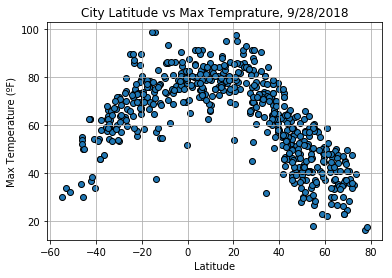

In [51]:
temperature_fig = plt.figure()
plt.grid()
plt.title('City Latitude vs Max Temprature, 9/28/2018')
plt.ylabel('Max Temperature (ºF)')
plt.xlabel('Latitude')
plt.scatter(weather_df['Lat'], weather_df['Max Temperature'], edgecolor='black')
temperature_fig.savefig('output_data/Temperature_Scatter.png', dpi=300)

#### Latitude vs. Humidity Plot

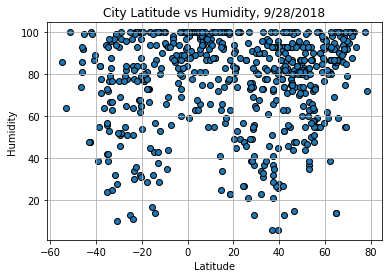

In [52]:
humidity_fig = plt.figure()
plt.grid()
plt.title('City Latitude vs Humidity, 9/28/2018')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor='black')
humidity_fig.savefig('output_data/Humidity_Scatter.png', dpi=300)

#### Latitude vs. Cloudiness Plot

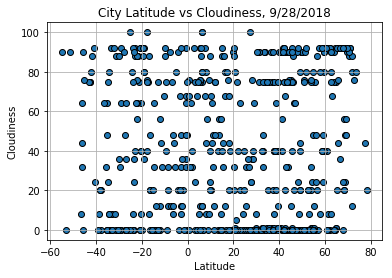

In [53]:
cloudiness_fig = plt.figure()
plt.grid()
plt.title('City Latitude vs Cloudiness, 9/28/2018')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolor='black')
cloudiness_fig.savefig('output_data/Cloudiness_Scatter.png', dpi=300)

#### Latitude vs. Wind Speed Plot

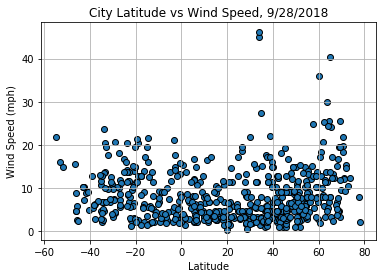

In [54]:
wind_speed = plt.figure()
plt.grid()
plt.title('City Latitude vs Wind Speed, 9/28/2018')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(weather_df['Lat'], weather_df['Wind'], edgecolor='black')
wind_speed.savefig('output_data/Wind_Speed_Scatter.png', dpi=300)